In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [19]:
df = pd.read_csv("E:\Klaviyo\screening_exercise_orders_v201810.csv")

In [20]:
# Question A : 
# Assemble a dataframe with one row per customer and the following columns:

# * customer_id
# * gender
# * most_recent_order_date
# * order_count (number of orders placed by this customer)

# Sort the dataframe by customer_id ascending and display the first 10 rows

In [21]:
df2 = df.drop(columns= ["value","predicted_gender"], inplace = False)
df2.sort_values(["customer_id", "date"], inplace = True) 
df2["order_count"] = df2["customer_id"].map(df2["customer_id"].value_counts()).astype(int)
df2.drop_duplicates(subset=['customer_id'], keep='last', inplace =True)
df2.sort_values(['customer_id'])
df2.rename({'date': 'most_recent_order_date'}, axis='columns',inplace = True, errors = 'ignore')
df2.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
1742,1002,1,2017-02-19 21:35:31,3
4323,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
12953,1005,1,2017-12-16 01:39:27,2
4798,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
12991,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


In [22]:
# Question B :
# Plot the count of orders per week for the store.

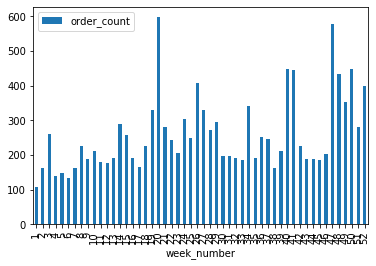

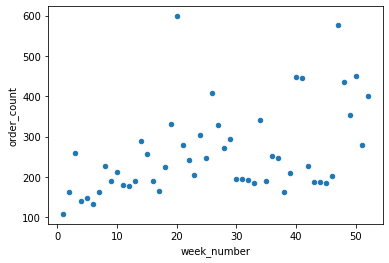

In [23]:
df3 = df2.loc[:, ["order_count"]]
df3["week_number"] = pd.to_datetime(df2["most_recent_order_date"]).dt.week
df4 = (df3.groupby("week_number").sum().reset_index())
df4.plot.bar(x="week_number", y="order_count")
df4.plot.scatter(x="week_number", y="order_count")

In [24]:
# Question C :
# Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

In [25]:
mean_of_genders = df.groupby('gender')['value'].mean()
mean_of_gender_0 = mean_of_genders[0]
mean_of_gender_1 = mean_of_genders[1]
print("\nThe mean of gender 0 is", mean_of_gender_0)
print("\nThe mean of gender 1 is",mean_of_gender_1)
variance_gender_0 = df.groupby('gender')['value'].var(ddof=1)[0]
variance_gender_1 = df.groupby('gender')['value'].var(ddof=1)[1]
std = np.sqrt((variance_gender_0 + variance_gender_1)/2)
n = float((df['customer_id'].count())/2)
t_stat = (mean_of_gender_0 - mean_of_gender_1)/(std*np.sqrt(2/n))
p_val = stats.t.sf(np.abs(t_stat), n-1)*2
print("\n Claim : Difference between mean of gender 0 and gender 1 is significant \n \t As such, our Null Hypothesis are\n")
print("\t \t 1. Mean of gender 0 is equals (=) to gender 1\n")
print("\t \t 2. Mean of gender 0 is less than or equals (<=) to gender 1\n")
print("\t \t 3. Mean of gender 0 is greater than or equals (>=) to gender 1\n")
print(" The t-value is :", t_stat)
print(" The p-value is :", p_val)
print(" The calculated p-value is less (<) than 0.05")
print("Conclusion")
print(" We accept the alternative hypothesis.\n There is statistically significant difference. ")


The mean of gender 0 is 363.89000591803506

The mean of gender 1 is 350.70836114422

 Claim : Difference between mean of gender 0 and gender 1 is significant 
 	 As such, our Null Hypothesis are

	 	 1. Mean of gender 0 is equals (=) to gender 1

	 	 2. Mean of gender 0 is less than or equals (<=) to gender 1

	 	 3. Mean of gender 0 is greater than or equals (>=) to gender 1

 The t-value is : 1.9759505628067568
 The p-value is : 0.04820112750826186
 The calculated p-value is less (<) than 0.05
Conclusion
 We accept the alternative hypothesis.
 There is statistically significant difference. 


In [26]:
# Question D :
# Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [27]:
print("\n The confusion matrix is:\n",confusion_matrix(df['gender'],df['predicted_gender']))
print("\n The accuracy is :\n",accuracy_score(df['gender'],df['predicted_gender']))
print("\n The report is : \n", classification_report(df['gender'],df['predicted_gender']))
print("\n Based on the above report, we can conclude that: \n Accuracy is 0.64. \n The Actual Yes and Predicted Yes is 5249")


 The confusion matrix is:
 [[3349 3410]
 [1463 5249]]

 The accuracy is :
 0.6382599658525722

 The report is : 
               precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471


 Based on the above report, we can conclude that: 
 Accuracy is 0.64. 
 The Actual Yes and Predicted Yes is 5249
